In [45]:
import plotly

print(plotly.__version__)

5.11.0


In [46]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [47]:
import plotly.express as px

df = px.data.iris()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


## 1. 그래프 생성

### 1-1. graph_objects

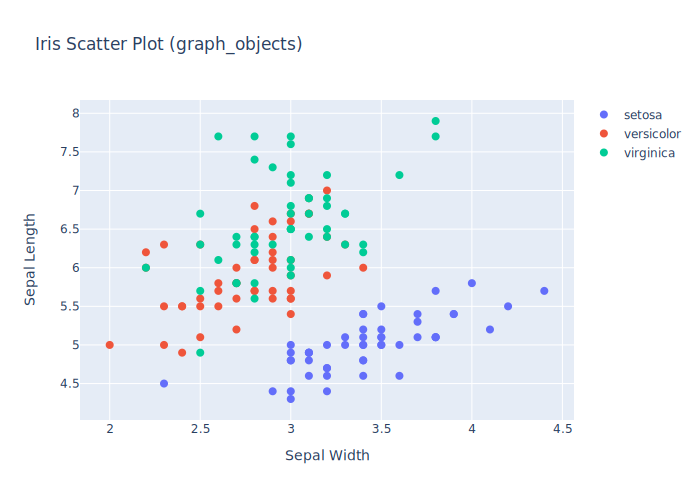

In [50]:
import plotly.graph_objects as go

df = px.data.iris()

fig = go.Figure()

# species별로 trace 추가
for species in df["species"].unique():
    species_df = df[df["species"] == species]
    
    fig.add_trace(
        go.Scatter(
            x=species_df["sepal_width"],
            y=species_df["sepal_length"],
            mode="markers",
            name=species,
            marker=dict(size=8)
        )
    )

fig.update_layout(
    title="Iris Scatter Plot (graph_objects)",
    xaxis_title="Sepal Width",
    yaxis_title="Sepal Length"
)

fig.show(renderer="svg")
#fig.show()로는 로컬에서는 시각화가 나타나지만, 깃허브에 올리는 용
#https://milkyspace.tistory.com/99

### 1-2. express

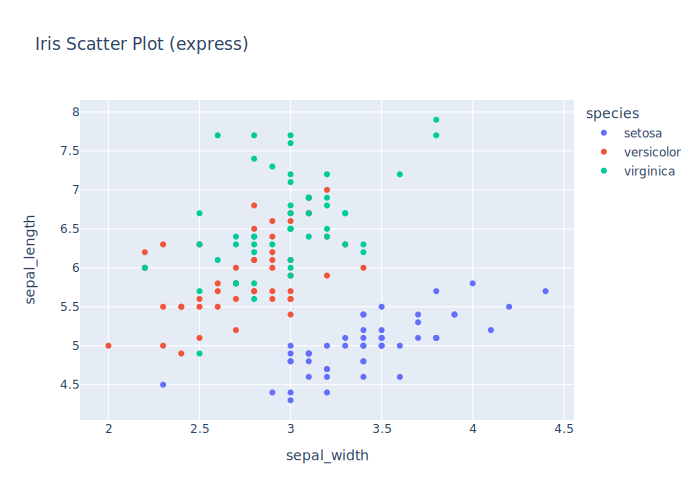

In [53]:
import plotly.express as px

fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                 title="Iris Scatter Plot (express)")

fig.show(renderer="svg")

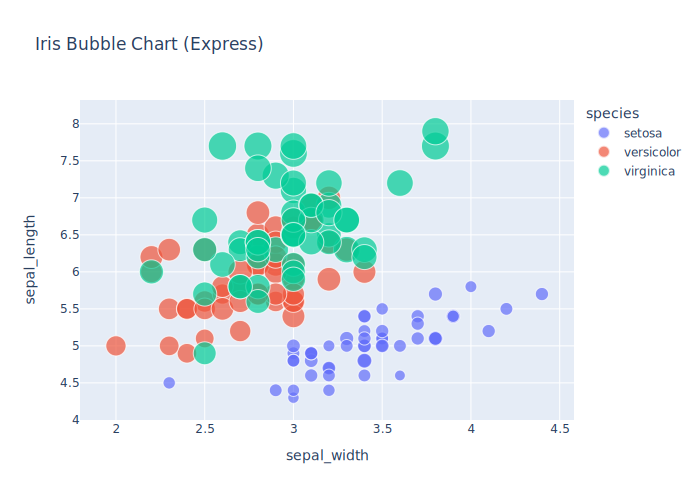

In [59]:
fig = px.scatter(
    df,
    x="sepal_width",
    y="sepal_length",
    size="petal_length",
    color="species",
    title="Iris Bubble Chart (Express)"
)

fig.show(renderer="svg")

## 2. update

### 2-2. update_traces()

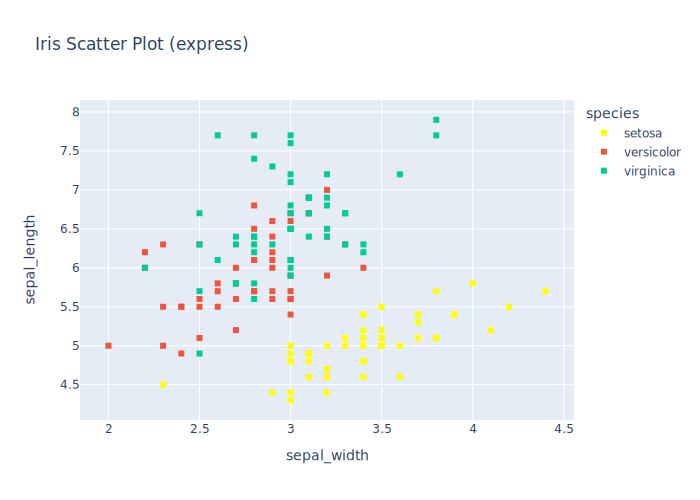

In [54]:
# 전체 마커 모양을 네모로 변경
fig.update_traces(
    marker=dict(symbol="square"),
    selector=dict(type="scatter", mode="markers")
)

# setosa만 노란색으로 변경
fig.update_traces(
    marker=dict(color="yellow"),
    selector=dict(name="setosa")
)

fig.show(renderer="svg")

### 2-3. add_traces()

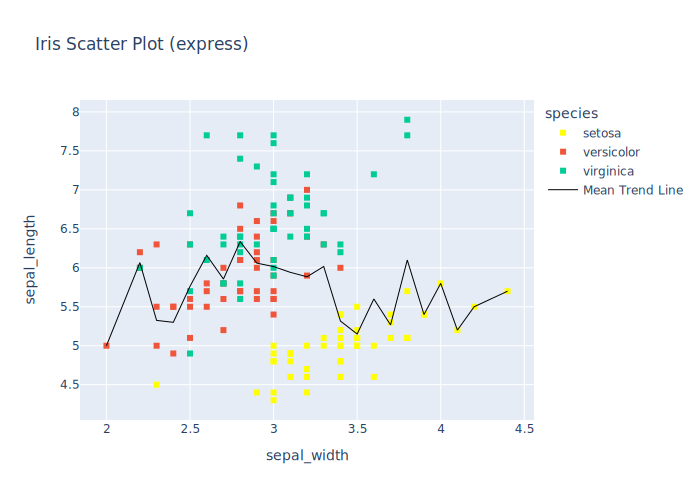

In [55]:
# sepal_width 기준으로 평균 sepal_length 계산
mean_df = (
    df.groupby("sepal_width", as_index=False)["sepal_length"]
      .mean()
      .sort_values("sepal_width")
)

fig.add_trace(
    go.Scatter(
        x=mean_df["sepal_width"],
        y=mean_df["sepal_length"],
        mode="lines",
        name="Mean Trend Line",
        line=dict(color="black", width=1)
    )
)

fig.show(renderer="svg")

### 2-4. update_layout()

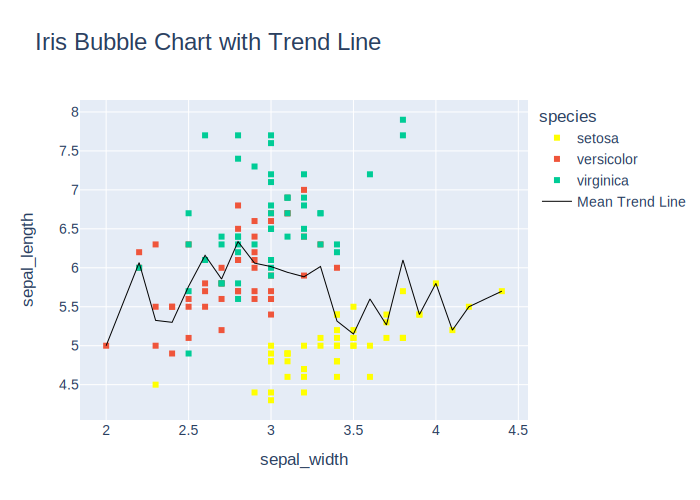

In [56]:
fig.update_layout(
    title="Iris Bubble Chart with Trend Line",
    font=dict(
        family="Arial",
        size=14
    ),
    title_font_size=24
)

fig.show(renderer="svg")

### 2-4. update_xaxes() / update_yaxes()

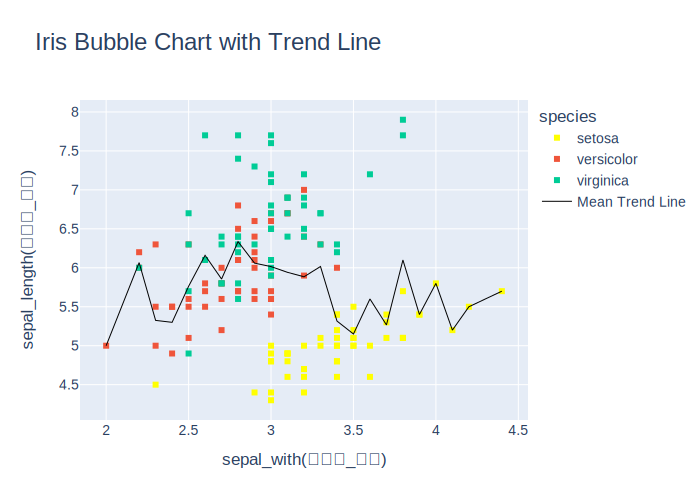

In [57]:
fig.update_xaxes(title_text='sepal_with(꽃받침_너비)')
fig.update_yaxes(title_text='sepal_length(꽃받침_길이)')

fig.show(renderer="svg")

### 이중 y축 : petal_length, petal_width

In [41]:
from plotly.subplots import make_subplots

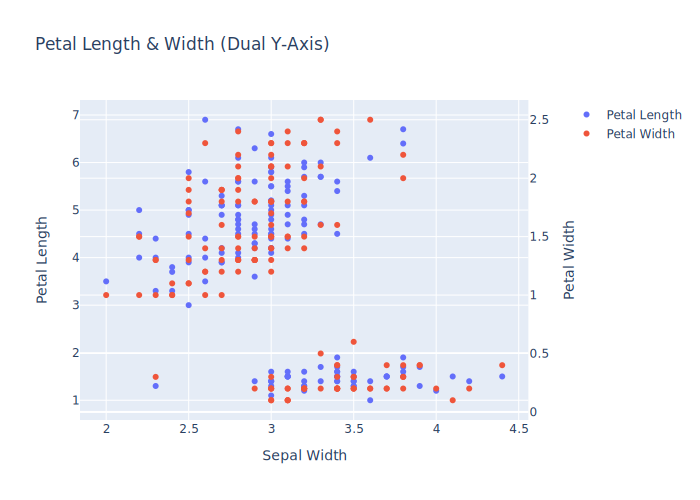

In [58]:
fig2 = make_subplots(specs=[[{"secondary_y": True}]])

# petal_length
fig2.add_trace(
    go.Scatter(
        x=df["sepal_width"],
        y=df["petal_length"],
        mode="markers",
        name="Petal Length"
    ),
    secondary_y=False
)

# petal_width
fig2.add_trace(
    go.Scatter(
        x=df["sepal_width"],
        y=df["petal_width"],
        mode="markers",
        name="Petal Width"
    ),
    secondary_y=True
)

fig2.update_layout(
    title="Petal Length & Width (Dual Y-Axis)",
    xaxis_title="Sepal Width"
)

fig2.update_yaxes(title_text="Petal Length", secondary_y=False)
fig2.update_yaxes(title_text="Petal Width", secondary_y=True)

fig2.show(renderer="svg")